### Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
path = r"C:\Users\dioog\02. Bloomberg Analysis"

In [3]:
df = pd.read_csv(os.path.join(path, "02_Data", "Prepared data", "df_Vs3.csv"))

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,...,01/06/2020,01/07/2020,03/08/2020,01/09/2020,01/10/2020,02/11/2020,ratio_yearvar_meanprice,performance category,Value category,performance category_2
0,0,0,AAPL US Equity,APPLE INC,2.045317e+12,1.0,Technology,NASDAQ GS,UNITED STATES,US,...,80.46,91.03,108.94,134.18,116.79,108.77,0.956738,pos_performers,High Value,high_positive_performance
1,1,1,ARAMCO AB Equity,SAUDI ARABIAN OI,1.887799e+12,2.0,Energy,Saudi Arabia,SAUDI ARABIA,SA,...,8.76,8.72,8.80,9.40,9.53,9.12,0.384372,no_data,High Value,no data
2,2,2,MSFT US Equity,MICROSOFT CORP,1.642367e+12,3.0,Technology,NASDAQ GS,UNITED STATES,US,...,182.83,204.70,216.54,227.27,212.46,202.33,0.540618,pos_performers,High Value,high_positive_performance
3,3,3,AMZN US Equity,AMAZON.COM INC,1.571013e+12,4.0,Communications,NASDAQ GS,UNITED STATES,US,...,2471.04,2878.70,3111.89,3499.12,3221.26,3004.48,0.771315,pos_performers,High Value,high_positive_performance
4,4,4,GOOGL US Equity,ALPHABET INC-A,1.202594e+12,5.0,Communications,NASDAQ GS,UNITED STATES,US,...,1434.87,1442.00,1482.76,1655.08,1487.90,1624.32,0.568911,pos_performers,High Value,high_positive_performance


In [5]:
df.shape

(4937, 32)

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Ticker', 'Short Name', 'Market Cap',
       'Rank(Current Market Cap)', 'Sector', 'Prim Exch Nm', 'Country',
       'Cntry of Incorp', 'Best Analyst Rating', '52Wk High', '52Wk Low',
       '52Wk Low Dt', '52Wk High Dt', '1Y Tot Ret (%)', '02/12/2019',
       '01/01/2020', '03/02/2020', '02/03/2020', '01/04/2020', '01/05/2020',
       '01/06/2020', '01/07/2020', '03/08/2020', '01/09/2020', '01/10/2020',
       '02/11/2020', 'ratio_yearvar_meanprice', 'performance category',
       'Value category', 'performance category_2'],
      dtype='object')

### Creating new variables

In [7]:
# New variable name: firm_excess_return

# New variable: ratio between "the difference between 52Wk High price and 52Wk Low price" and "average_52wk_price"

df["firm_excess_return"] = (df["1Y Tot Ret (%)"])/(df["1Y Tot Ret (%)"].mean())


In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Ticker', 'Short Name', 'Market Cap',
       'Rank(Current Market Cap)', 'Sector', 'Prim Exch Nm', 'Country',
       'Cntry of Incorp', 'Best Analyst Rating', '52Wk High', '52Wk Low',
       '52Wk Low Dt', '52Wk High Dt', '1Y Tot Ret (%)', '02/12/2019',
       '01/01/2020', '03/02/2020', '02/03/2020', '01/04/2020', '01/05/2020',
       '01/06/2020', '01/07/2020', '03/08/2020', '01/09/2020', '01/10/2020',
       '02/11/2020', 'ratio_yearvar_meanprice', 'performance category',
       'Value category', 'performance category_2', 'firm_excess_return'],
      dtype='object')

In [9]:
df["firm_excess_return"].describe()

count    4937.000000
mean        1.000000
std         3.576321
min        -2.978878
25%        -0.275333
50%         0.281077
75%         1.312330
max        97.555104
Name: firm_excess_return, dtype: float64

In [14]:
df["1Y Tot Ret (%)"].mean()

26.113856593072686

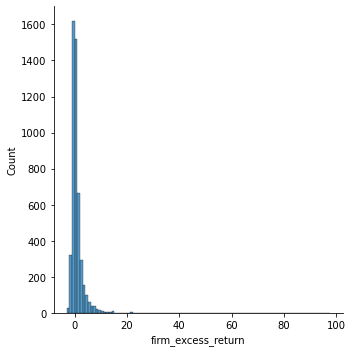

In [11]:
sns.displot(df['firm_excess_return'], bins = 100)

In [15]:
## Creating a dataframe that excludes companies that are listed for less than one year and that, for this reason, "1Y Tot Ret (%)" equals zero. 

df2 = df[df["1Y Tot Ret (%)"] != 0]

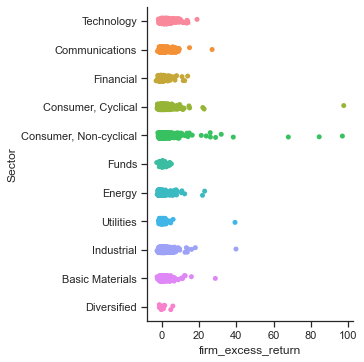

In [18]:
# Creating a categorical plot to study the distribution of "1Y Tot Ret" by sector.

sns.set(style="ticks")
g = sns.catplot(x="firm_excess_return", y="Sector", data= df2)


,Unnamed: 0,Unnamed: 0.1,Market Cap,Rank(Current Market Cap),Best Analyst Rating,52Wk High,52Wk Low,1Y Tot Ret (%),02/12/2019,01/01/2020,...,01/04/2020,01/05/2020,01/06/2020,01/07/2020,03/08/2020,01/09/2020,01/10/2020,02/11/2020,ratio_yearvar_meanprice,firm_excess_return
Sector,,,,,,,,,,,,,,,,,,,,,
Basic Materials,2607.031847,2607.031847,1.264630e+10,2617.592357,3.917072,91.399522,54.623822,37.470669,69.583185,73.130478,...,63.113567,67.987261,71.693057,72.566879,78.785000,82.377229,81.389618,79.891592,0.820123,1.434896
Communications,2134.810811,2134.810811,4.005231e+10,2143.104730,3.971748,108.532770,48.502027,34.617534,68.256385,70.885878,...,59.206486,69.548919,78.126959,82.967095,89.036115,94.855574,90.979966,88.711250,0.779472,1.325639
"Consumer, Cyclical",2487.371886,2487.371886,1.689358e+10,2497.115658,3.942012,91.219947,38.900676,31.458399,68.985036,71.036406,...,47.860302,56.540996,63.527367,65.112135,70.210018,76.003363,76.125089,70.773488,0.873953,1.204663
"Consumer, Non-cyclical",2355.035545,2355.035545,2.062503e+10,2364.349526,4.088793,218.796019,131.558021,45.643483,173.856078,180.001351,...,164.023673,170.144277,179.091694,178.525225,183.411363,190.889206,192.682239,189.365664,0.795814,1.747865
Diversified,2892.235294,2892.235294,8.850449e+09,2904.588235,4.236878,35.297647,19.771176,17.190000,29.282941,29.287059,...,23.988824,25.068235,24.307647,25.785882,27.875882,27.397059,25.965882,26.531765,0.771549,0.658271
Energy,2389.580460,2389.580460,1.764464e+10,2398.494253,4.106381,59.543621,24.800862,13.279310,47.827759,51.466494,...,30.271667,34.522184,38.283161,37.759080,37.875862,39.490287,37.322126,36.046897,1.027958,0.508516
Financial,2450.841719,2450.841719,1.666105e+10,2460.654088,3.818823,493.328459,317.948543,1.174465,460.063344,469.301415,...,358.470178,375.507998,381.758312,372.879738,407.840262,440.999885,430.188312,416.174602,0.712172,0.044975
Funds,2583.040214,2583.040214,1.507816e+10,2594.026810,0.013441,102.507105,63.845871,12.249732,86.170724,88.571153,...,71.806381,79.468472,85.173887,86.944343,91.670027,95.848928,93.104879,91.825121,0.434290,0.469089
Industrial,2668.985380,2668.985380,1.278192e+10,2679.809942,4.064029,83.360395,40.248056,31.343816,64.079678,67.258304,...,50.177500,54.884108,60.615439,60.750088,64.795307,69.073874,67.086213,67.555351,0.773454,1.200275


In [21]:
## Creating a reduded dataframe 

df2_reduced = df2[['Ticker', 'Short Name', 'Market Cap', 'Sector', 'Prim Exch Nm', 'Country', 'firm_excess_return']]

In [22]:
df2_reduced.groupby(['Sector']).mean()

,Market Cap,firm_excess_return
Sector,,
Basic Materials,1.264630e+10,1.434896
Communications,4.005231e+10,1.325639
"Consumer, Cyclical",1.689358e+10,1.204663
"Consumer, Non-cyclical",2.062503e+10,1.747865
Diversified,8.850449e+09,0.658271
Energy,1.764464e+10,0.508516
Financial,1.666105e+10,0.044975
Funds,1.507816e+10,0.469089
Industrial,1.278192e+10,1.200275


In [29]:
result = df2_reduced.groupby(["Sector"])['firm_excess_return'].aggregate(np.mean).reset_index().sort_values('firm_excess_return')

In [30]:
result

,Sector,firm_excess_return
6,Financial,0.044975
10,Utilities,0.440284
7,Funds,0.469089
5,Energy,0.508516
4,Diversified,0.658271
8,Industrial,1.200275
2,"Consumer, Cyclical",1.204663
1,Communications,1.325639
0,Basic Materials,1.434896
3,"Consumer, Non-cyclical",1.747865


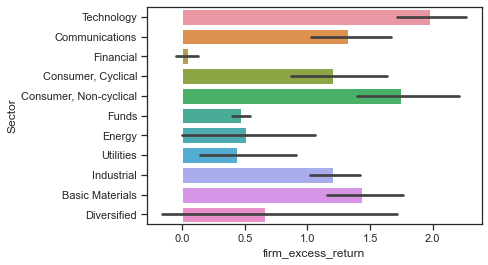

In [28]:
bar_sector_performance = sns.barplot(x="firm_excess_return", y="Sector", data=df2_reduced, order=)

In [38]:
df2.to_csv(os.path.join(path, "02_Data", "Prepared data", "df_Vs3_exc_newbies.csv"))

In [39]:
df2_reduced.to_csv(os.path.join(path, "02_Data", "Prepared data", "df_Vs3_exc_newbies_reduced.csv"))

In [40]:
df.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Ticker', 'Short Name', 'Market Cap',
       'Rank(Current Market Cap)', 'Sector', 'Prim Exch Nm', 'Country',
       'Cntry of Incorp', 'Best Analyst Rating', '52Wk High', '52Wk Low',
       '52Wk Low Dt', '52Wk High Dt', '1Y Tot Ret (%)', '02/12/2019',
       '01/01/2020', '03/02/2020', '02/03/2020', '01/04/2020', '01/05/2020',
       '01/06/2020', '01/07/2020', '03/08/2020', '01/09/2020', '01/10/2020',
       '02/11/2020', 'ratio_yearvar_meanprice', 'performance category',
       'Value category', 'performance category_2', 'firm_excess_return'],
      dtype='object')